# Plan de trabajo

### Día 1-2: Análisis exploratorio de Datos

* Revisar los datos proporcionados y explorar sus características
1. Tipo de servicio
2. Información del contrato
3. Métodos de pago

### Día 3: Preprocesamiento de Datos

* Realiza limpieza de datos: maneja valores nulos, inconsistencias y errores.
* Normaliza o transforma las variables si es necesario:
    - Estandarizar variables numéricas.
    - Codifica las variables categóricas.
    - Balancear clases usando técnicas como: con submuestreo, sobremustreo o SMOTE.
* Investiga las variables que puedan tener una fuerte relación con la cancelación de clientes.

### Día 4: Análisis Exploratorio de Datos (EDA)

* Identifica patrones o tendencias en las variables que podrían estar relacionadas con la cancelación.
* Visualiza las distribuciones de datos para comprender la importancia de cada servicio.

### Día 5: Selección de Características

* Crea nuevas características a partir de las existentes si encuentras patrones relevantes.
* Selecciona las variables más prometedoras para el modelo.

### Día 6-8: Desarrollo del Modelo y Evaluación

* Divide los datos en conjuntos de entrenamiento y prueba.
Prueba varios algoritmos de clasificación como: regresión logística, árboles de decisión, bosques aleatorios y selecciona el que mejor funcione.

* Evalúa el rendimiento usando métricas como precisión, recall y F1-score.
Ajusta hiperparámetros del modelo para mejorar el desempeño si es necesario.

* Realiza una validación cruzada para verificar la robustez del modelo.
Analiza la importancia de las características para entender qué factores son más influyentes.

### Día 8-10: Desarrollo del Modelo y Evaluación

* Preparación del Reporte y Resultados: 
    - Documenta los pasos realizados, el rendimiento del modelo y las características más importantes. 
    - Prepara visualizaciones que expliquen los resultados y el comportamiento del modelo.

* Presenta los hallazgos al equipo de Interconnect. Sugiere cómo utilizar el modelo para identificar clientes en riesgo y optimizar el uso de promociones

# Descripción de los datos

# Interconnect

Al operador de telecomunicaciones Interconnect le gustaría poder pronosticar su tasa de cancelación de clientes. Si se descubre que un usuario o usuaria planea irse, se le ofrecerán códigos promocionales y opciones de planes especiales. El equipo de marketing de Interconnect ha recopilado algunos de los datos personales de sus clientes, incluyendo información sobre sus planes y contratos.

## Servicios de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, línea de abonado digital) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

1. Seguridad en Internet: software antivirus (ProtecciónDeDispositivo) y un bloqueador de sitios web maliciosos (SeguridadEnLínea).
2. Una línea de soporte técnico (SoporteTécnico).
3. Almacenamiento de archivos en la nube y backup de datos (BackupOnline).
4. Streaming de TV (StreamingTV) y directorio de películas (StreamingPelículas)

* La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. 
* Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

## Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

* contract.csv — información del contrato;
* personal.csv — datos personales del cliente;
* internet.csv — información sobre los servicios de Internet;
* phone.csv — información sobre los servicios telefónicos.

En cada archivo, la columna customerID (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.


In [159]:

# Importar bibliotecas
import pandas as pd
print('pandas version:',pd.__version__)
import seaborn as sns
print('seaborn version:',sns.__version__)
import matplotlib 
print('matplotlib version:',matplotlib.__version__)
from matplotlib  import pyplot as plt
import numpy as np
print('numpy version:',np.__version__)
import sklearn
print('sklearn version:',sklearn.__version__)
import time



from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import lightgbm as lgb
print ('lightgbm version:',lgb.__version__)
from catboost import CatBoostClassifier

pandas version: 2.2.3
seaborn version: 0.13.2
matplotlib version: 3.9.2
numpy version: 1.26.4
sklearn version: 1.5.2
lightgbm version: 4.5.0


In [ ]:

def rename(data):
    '''
    Renombrar columnas

    data: DataFrame
    
    Bucle en los encabezados para:
    1. Poner todo en minúsculas
    2. Eliminar los espacios
    3. Remplazar espacio entre palabras por "_"
    '''
    new_col_names = []

    for name in data.columns:
        # Luego, pon todas las letras en minúsculas
        name_lowered = name.lower()
        # Elimina los espacios al principio y al final
        name_stripped = name_lowered.strip()
        # Por último, reemplaza los espacios entre palabras por guiones bajos
        name_no_spaces = name_stripped.replace(' ', '_')
        # Agrega el nuevo nombre a la lista de nuevos nombres de columna
        new_col_names.append(name_no_spaces)

    # Reemplaza los nombres anteriores por los nuevos
    data.columns = new_col_names

############################################################################################################

def info(data):
    '''
    Informacion de los datos

    data: DataFrame

    1. Muestra las primeras 10 filas
    2. Información general
    3. Estadísticas descriptivas
    4. Valores duplicados 
    5. Porcentaje de valores nulos de un DataFrame
    '''
    display(data.head(10))
    print()
    print(data.info())
    print()
    print(data.describe())
    print()
    print('Duplicated: ',data.duplicated().sum())
    print()
    print('Null values %:')
    print(100*data.isnull().sum()/len(data))

############################################################################################################

def plot_countplots(data, columns, title_prefix='', rotation=45):
    ''' 
    Graficar conteos de valores en columnas categóricas

    data: DataFrame
    columns: Lista de columnas a graficar
    title_prefix: Prefijo para el título de la gráfica
    rotation: Rotación de las etiquetas del eje x
    '''
    num_cols = len(columns)
    fig, axes = plt.subplots(num_cols, 1, figsize=(12, 4*num_cols))
    if num_cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, column in enumerate(columns):
        if i < len(axes):
            sns.countplot(ax=axes[i], x=column, data=data)
            axes[i].set_title(f'{title_prefix} - {column}')
            axes[i].tick_params(axis='x', rotation=rotation)
        else:
            print(f"Column '{column}' not found in the DataFrame")
    plt.tight_layout()
    plt.show()

############################################################################################################


def plot_histoplots(data, columns):
    ''' 
    Graficar histogramas de columnas numéricas

    data: DataFrame
    columns: Lista de columnas a graficar
    '''
    num_cols = len(columns)
    fig, axes = plt.subplots(num_cols, 1, figsize=(12, 4 * num_cols))

    # Si solo hay una columna, axes no será una lista
    if num_cols == 1:
        axes = [axes]

    for i, column in enumerate(columns):
        if column in data.columns:
            sns.histplot(data=data, x=column, hue='enddate', kde=True, ax=axes[i])
            #sns.histplot(data[column], ax=axes[i])
            axes[i].set_title('Distribución de ' + column)
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frecuencia')
            for label in axes[i].get_xticklabels():
                label.set_rotation(45)
                
        else:
            print(f"Column '{column}' not found in the DataFrame")

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5) 
    plt.show()

############################################################################################################

def plot_boxplots(data, columns, target_column):
    '''
    Graficar boxplots de columnas numéricas

    data: DataFrame
    columns: Lista de columnas a graficar
    target_column: Columna objetivo

    1. Grafica boxplots de columnas numéricas en función de la columna objetivo
    2. Calcula las estadísticas del boxplot por grupo de la columna objetivo
  '''

    num_cols = len(columns)
    fig, axes = plt.subplots(num_cols, 1, figsize=(12, 4*num_cols))
    if num_cols == 1:
        axes = [axes]
    else:
        axes = axes.flatten()

    for i, column in enumerate(columns):
        if i < len(axes):
            sns.boxplot(ax=axes[i], x=target_column, y=column, data=data)
            axes[i].set_title(f'{column} vs {target_column}')
            # Calcular estadísticas del boxplot por grupo de 'EndDate'
            grouped = data.groupby(target_column)[column]
            for name, group in grouped:
                Q1 = group.quantile(0.25)
                Q3 = group.quantile(0.75)
                IQR = Q3 - Q1
                lower = Q1 - 1.5 * IQR
                upper = Q3 + 1.5 * IQR
                outliers = group[(group < lower) | (group > upper)]
            
                # Imprimir estadísticas
                print(f'\n{column} Statistics for EndDate = {name}:')
                print(f'Q1 (25th percentile): {Q1}')
                print(f'Q3 (75th percentile): {Q3}')
                print(f'IQR (Interquartile Range): {IQR}')
                print(f'Lower Whisker: {lower}')
                print(f'Upper Whisker: {upper}')
               #print(f'Outliers: {outliers.values}')
    
        else:
            print(f"Column '{column}' not found in the DataFrame")
    plt.tight_layout()
    plt.show()

############################################################################################################


def explore_data(data, columns):
    ''' 
    Explorar los datos de un DataFrame y calcula el porcentaje

    data: DataFrame
    columns: Lista de columnas a explorar

    1. Imprime la frecuencia de valores únicos en las columnas especificadas
    '''
    for column in columns:
        print(f"Frecuencia de {column}:")
        counts_percent = data[column].value_counts()/len(data) * 100
        print(f"%",round(counts_percent,2))

        print("\n")

############################################################################################################


def encode_categorical_columns(data):
    ''' 
    Codificar variables categóricas en un DataFrame

    data: DataFrame
    
    1. Utiliza LabelEncoder para codificar las variables categóricas en un DataFrame
    2. Devuelve el DataFrame con las variables categóricas codificadas
    '''

    categorical_columns = data.select_dtypes(include=['object']).columns[1:]
    label_encoder = LabelEncoder()
    for column in categorical_columns:
        data[column] = label_encoder.fit_transform(data[column])
    return data

############################################################################################################

def feature_rf(data,drop_columns,target_column):
    '''
    Entrenar un modelo de Random Forest para seleccionar características

    data: DataFrame

    drop_columns: Lista de columnas a eliminar
    target_column: Nombre de la variable objetivo

    1. Separar características y variable objetivo
    2. Dividir los datos en conjuntos de entrenamiento y prueba
    3. Entrenar un modelo de Random Forest
    4. Evaluar el modelo
    5. Mostrar la importancia de características
    6. Guardar los valores de importancia de características
    '''
 
    X = data.drop(columns=drop_columns)
    y = data[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)
  
    model = RandomForestRegressor(random_state=12345)
    model.fit(X_train, y_train)
   
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
   
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    feature_importances.sort_values().plot(kind='barh')
    plt.title('Importancia de Características')
    plt.show()
  
    sorted_importances = feature_importances.sort_values(ascending=False)
    print(sorted_importances)
    return sorted_importances
############################################################################################################

def select_features(data, feature_importances, threshold):
    '''
    Seleccionar características de un DataFrame

    data: DataFrame
    feature_importances: Serie de importancia de características
    threshold: Umbral para seleccionar características

    1. Seleccionar características con importancia mayor que el umbral
    2. Devolver un nuevo DataFrame con las características seleccionadas
    '''
    selected_features = feature_importances[feature_importances > threshold].index
    selected_data = data[selected_features]
    print(f'Selected Features: {selected_features}')
    return selected_data 

############################################################################################################

def balance_classes(data, target_column):
    ''' 
    Balancear las clases de una variable objetivo

    data: DataFrame
    target_column: Nombre de la variable objetivo

    1. Separar características y variable objetivo
    2. Usar SMOTE para balancear las clases
    3. Crear un nuevo DataFrame con las clases balanceadas
    '''
   
    X = data.drop(columns=[target_column])
    y = data[target_column]

    smote = SMOTE(sampling_strategy='minority', random_state=12345)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    balanced_data = pd.concat([X_resampled, y_resampled], axis=1)
    return balanced_data

############################################################################################################

def scale_data(data, target_column):
    '''
    Escalar las características de un DataFrame

    data: DataFrame
    target_column: Nombre de la variable objetivo

    1. Separar características y variable objetivo
    2. Escalar las características
    3. Crear un nuevo DataFrame con las características escaladas 
    '''

    X = data.drop(columns=[target_column])
    y = data[target_column]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    scaled_data = pd.DataFrame(X_scaled, columns=X.columns)
    scaled_data['enddate'] = y
    return scaled_data

############################################################################################################

def evaluate_model(model, train_features, train_target, val_features, val_target, test_features, test_target):
    '''
    Evaluar un modelo en conjuntos de entrenamiento, validación y prueba

    model: Modelo de aprendizaje automático
    train_features: Características de entrenamiento
    train_target: Variable objetivo de entrenamiento
    val_features: Características de validación
    val_target: Variable objetivo de validación
    test_features: Características de prueba
    test_target: Variable objetivo de prueba

    1. Realizar predicciones en los conjuntos de entrenamiento, validación y prueba
    2. Calcular las métricas F1 y AUC para cada conjunto
    3. Devolver las métricas F1 y AUC para cada conjunto
    '''
    
    train_predictions = model.predict(train_features)
    f1_train = f1_score(train_target, train_predictions, average='weighted')
    auc_train = roc_auc_score(train_target, train_predictions)

    val_predictions = model.predict(val_features)
    f1_val = f1_score(val_target, val_predictions, average='weighted')
    auc_val = roc_auc_score(val_target, val_predictions)
    
    test_predictions = model.predict(test_features)
    f1_test = f1_score(test_target, test_predictions, average='weighted')
    auc_test = roc_auc_score(test_target, test_predictions)
    
    return f1_train, f1_val, f1_test, auc_train, auc_val, auc_test

############################################################################################################

def train_and_evaluate_models(train_features, train_target, val_features, val_target, test_features, test_target, models, model_names):
    '''
    Entrenar y evaluar varios modelos de aprendizaje automático

    train_features: Características de entrenamiento
    train_target: Variable objetivo de entrenamiento
    val_features: Características de validación
    val_target: Variable objetivo de validación
    test_features: Características de prueba
    test_target: Variable objetivo de prueba
    models: Lista de modelos de aprendizaje automático
    model_names: Lista de nombres de modelos

    1. Iterar sobre los modelos y sus nombres
    2. Entrene cada modelo 
    3. Evaluar cada modelo en los conjuntos de entrenamiento, validación y prueba
    4. Imprimir las métricas F1 y AUC para cada modelo y conjunto
    5. Devolver las métricas F1 y AUC para cada modelo y conjunto  
    '''
    f1_scores = []
    roc_auc_scores = []
    time_scores = []    
    for model, model_name in zip(models, model_names):
        print(f'\n{model_name}')
        start_time = time.time()
        model.fit(train_features, train_target)
        f1_train, f1_val, f1_test, auc_train, auc_test, auc_val = evaluate_model(model, train_features, train_target, val_features, val_target, test_features, test_target)
        f1_scores.append((model_name, f1_train, f1_val, f1_test))
        roc_auc_scores.append((model_name, auc_train, auc_val, auc_test))
        end_time = time.time()
        time_scores.append((model_name, end_time - start_time))
        print(f'Train: F1 {f1_train}, AUC {auc_train}')
        print(f'Validation: F1 {f1_val}, AUC {auc_val}')
        print(f'Test: F1 {f1_test}, AUC {auc_test}')
        print(f'Time: {end_time - start_time} seconds')

    return f1_scores, roc_auc_scores, time_scores

############################################################################################################
def plot_and_print_scores(models, model_names, f1_scores, roc_auc_scores):
    ''' 
    Graficar y mostrar los puntajes F1 y AUC de los modelos

    models: Lista de modelos de aprendizaje automático
    model_names: Lista de nombres de modelos
    f1_scores: Lista de tuplas con puntajes F1
    roc_auc_scores: Lista de tuplas con puntajes AUC

    1. Crear DataFrames para los puntajes F1 y AUC
    2. Derretir los DataFrames para facilitar la visualización
    3. Graficar los puntajes F1
    4. Graficar los puntajes AUC
    5. Imprimir los resultados
       
    '''
    # Crear DataFrames para los F1 scores y ROC AUC scores
    f1_scores_df = pd.DataFrame(f1_scores, columns=['Model', 'F1 Train', 'F1 Validation', 'F1 Test'])
    roc_auc_scores_df = pd.DataFrame(roc_auc_scores, columns=['Model', 'AUC Train', 'AUC Validation', 'AUC Test'])
    
    # Derretir el DataFrame para que sea más fácil de graficar
    f1_scores_melted = f1_scores_df.melt(id_vars='Model', var_name='Dataset', value_name='F1 Score')
    roc_auc_scores_melted = roc_auc_scores_df.melt(id_vars='Model', var_name='Dataset', value_name='AUC Score')
    # Graficar los F1 scores
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='F1 Score', hue='Dataset', data=f1_scores_melted)
    plt.title('F1 Scores for Train, Validation, and Test Sets')
    plt.ylabel('F1 Score')
    plt.xlabel('Model')
    plt.legend(title='Dataset')
    plt.xticks(rotation=45)
    plt.show()

    # Graficar los ROC AUC scores
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='AUC Score', hue='Dataset',data=roc_auc_scores_melted)
    plt.title('ROC AUC Scores for Train, Validation, and Test Sets')
    plt.ylabel('AUC Score')
    plt.xlabel('Model')
    plt.legend(title='Dataset')
    plt.xticks(rotation=45)
    plt.show()

    
    # Imprimir los resultados
    print(f1_scores_df)
    print()
    print(roc_auc_scores_df)
    
############################################################################################################

def find_best_models(roc_auc_scores, f1_scores, time_scores):
    ''' 
    Encontrar los mejores modelos basados en los puntajes AUC y F1

    roc_auc_scores: Lista de tuplas con puntajes AUC
    f1_scores: Lista de tuplas con puntajes F1
    time_scores: Lista de tuplas con tiempos de entrenamiento

    1. Convertir las listas de tuplas a DataFrames
    2. Encontrar el mejor modelo basado en el AUC Test más alto
    3. Encontrar el mejor modelo basado en el F1 Test más alto
    4. Mostrar el mejor modelo
   
    '''
    # Convertir la lista de tuplas a DataFrames
    roc_auc_scores_df = pd.DataFrame(roc_auc_scores, columns=['Model', 'AUC Train', 'AUC Validation', 'AUC Test'])
    f1_scores_df = pd.DataFrame(f1_scores, columns=['Model', 'F1 Train', 'F1 Validation', 'F1 Test'])
    time_scores_df = pd.DataFrame(time_scores, columns=['Model', 'Time'])
    # Encontrar el mejor modelo basado en el AUC Test más alto
    best_model_auc = roc_auc_scores_df[roc_auc_scores_df['AUC Test'] == roc_auc_scores_df['AUC Test'].max()]
    
    # Encontrar el mejor modelo basado en el F1 Test más alto
    best_model_f1 = f1_scores_df[f1_scores_df['F1 Test'] == f1_scores_df['F1 Test'].max()]  
    
    # Mostrar el mejor modelo
    print("Best Model based on AUC Test:")
    print(best_model_auc)
    print("\nBest Model based on F1 Test:")
    print(best_model_f1)
    print("\nTime Scores:")
    print(time_scores_df)
       
    return best_model_auc, best_model_f1



# Análisis exploratorio de los datos

In [ ]:
#Datos
file_paths = ['./datasets/personal.csv','./datasets/contract.csv', './datasets/internet.csv', './datasets/phone.csv']
data_frames = [pd.read_csv(file_path) for file_path in file_paths]
data_0, data_1, data_2, data_3= data_frames


In [ ]:
# Renombrar columnas
rename(data_0)
rename(data_1)
rename(data_2)
rename(data_3)

## Información de los clientes (data_0)

,customerid,gender,seniorcitizen,partner,dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
5,9305-CDSKC,Female,0,No,No
6,1452-KIOVK,Male,0,No,Yes
7,6713-OKOMC,Female,0,No,No
8,7892-POOKP,Female,0,Yes,No
9,6388-TABGU,Male,0,No,Yes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     7043 non-null   object
 1   gender         7043 non-null   object
 2   seniorcitizen  7043 non-null   int64 
 3   partner        7043 non-null   object
 4   dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

       seniorcitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000

Duplicated:  0

Null values %:
customerid       0.0
gender           0.0
seniorcitizen    0.0
partner          0.0
dependents       0.0
dtype: float64


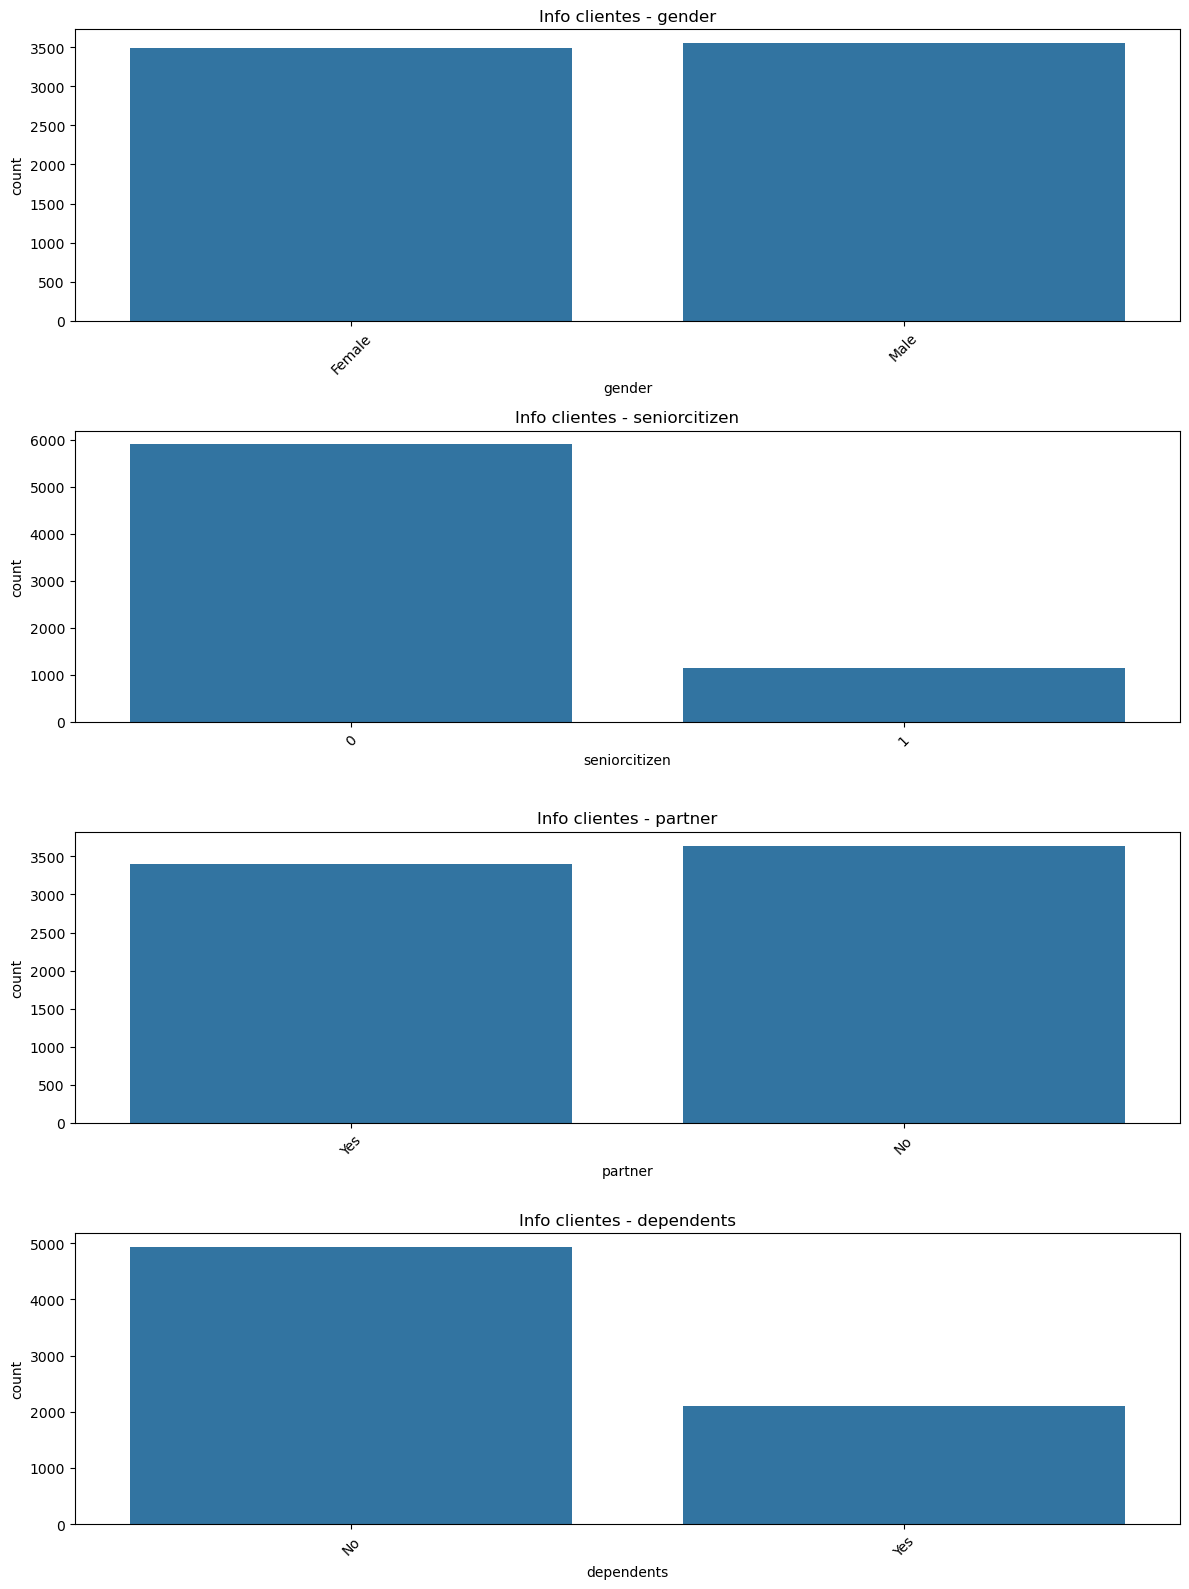

Frecuencia de gender:
% gender
Male      50.48
Female    49.52
Name: count, dtype: float64


Frecuencia de seniorcitizen:
% seniorcitizen
0    83.79
1    16.21
Name: count, dtype: float64


Frecuencia de partner:
% partner
No     51.7
Yes    48.3
Name: count, dtype: float64


Frecuencia de dependents:
% dependents
No     70.04
Yes    29.96
Name: count, dtype: float64




In [162]:
info(data_0)
columns_to_explore = ['gender', 'seniorcitizen', 'partner','dependents']
plot_countplots(data_0, columns_to_explore, title_prefix='Info clientes')
explore_data(data_0, columns_to_explore)

<div class="alert alert-block alert-info">
<b>

### 1. Información del cliente

* Contiene 7043 entradas y 5 columnas, 
* Sin valores nulos ni filas duplicadas. 

* `customerID`: Identificador único para cada cliente.
   
* `gender`: Género del cliente (Male/Female).
    - 49.52%  mujeres y 50.48% hombres  (muestra equilibrada)
* `SeniorCitizen`: Indica si el cliente es un ciudadano senior (0 = No, 1 = Sí). 
    - Columna numérica
    - 16.21% son adultos y 83.79% no lo son
* `Partner`: Indica si el cliente tiene pareja (Yes/No).
    -   51.7% clientes que no tienen socios y 48.3% que sí tienen socios (muestra equilibrada)
* `Dependents`: Indica si el cliente tiene dependientes (Yes/No).
    - 70.04% no tienen dependientes y 29.96% si tienen.
* Las demás columnas son de tipo object y contienen información categórica sobre los clientes.

</b> <a class="tocSkip"></a>

## Tipo de contrato (data_1)

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

       monthlycharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000

Duplicated:  0

Null values %:
customerid          0.0
begindate           0.0
enddate             0.0
type                0.0
paperlessbilling    0.0
paymentmethod

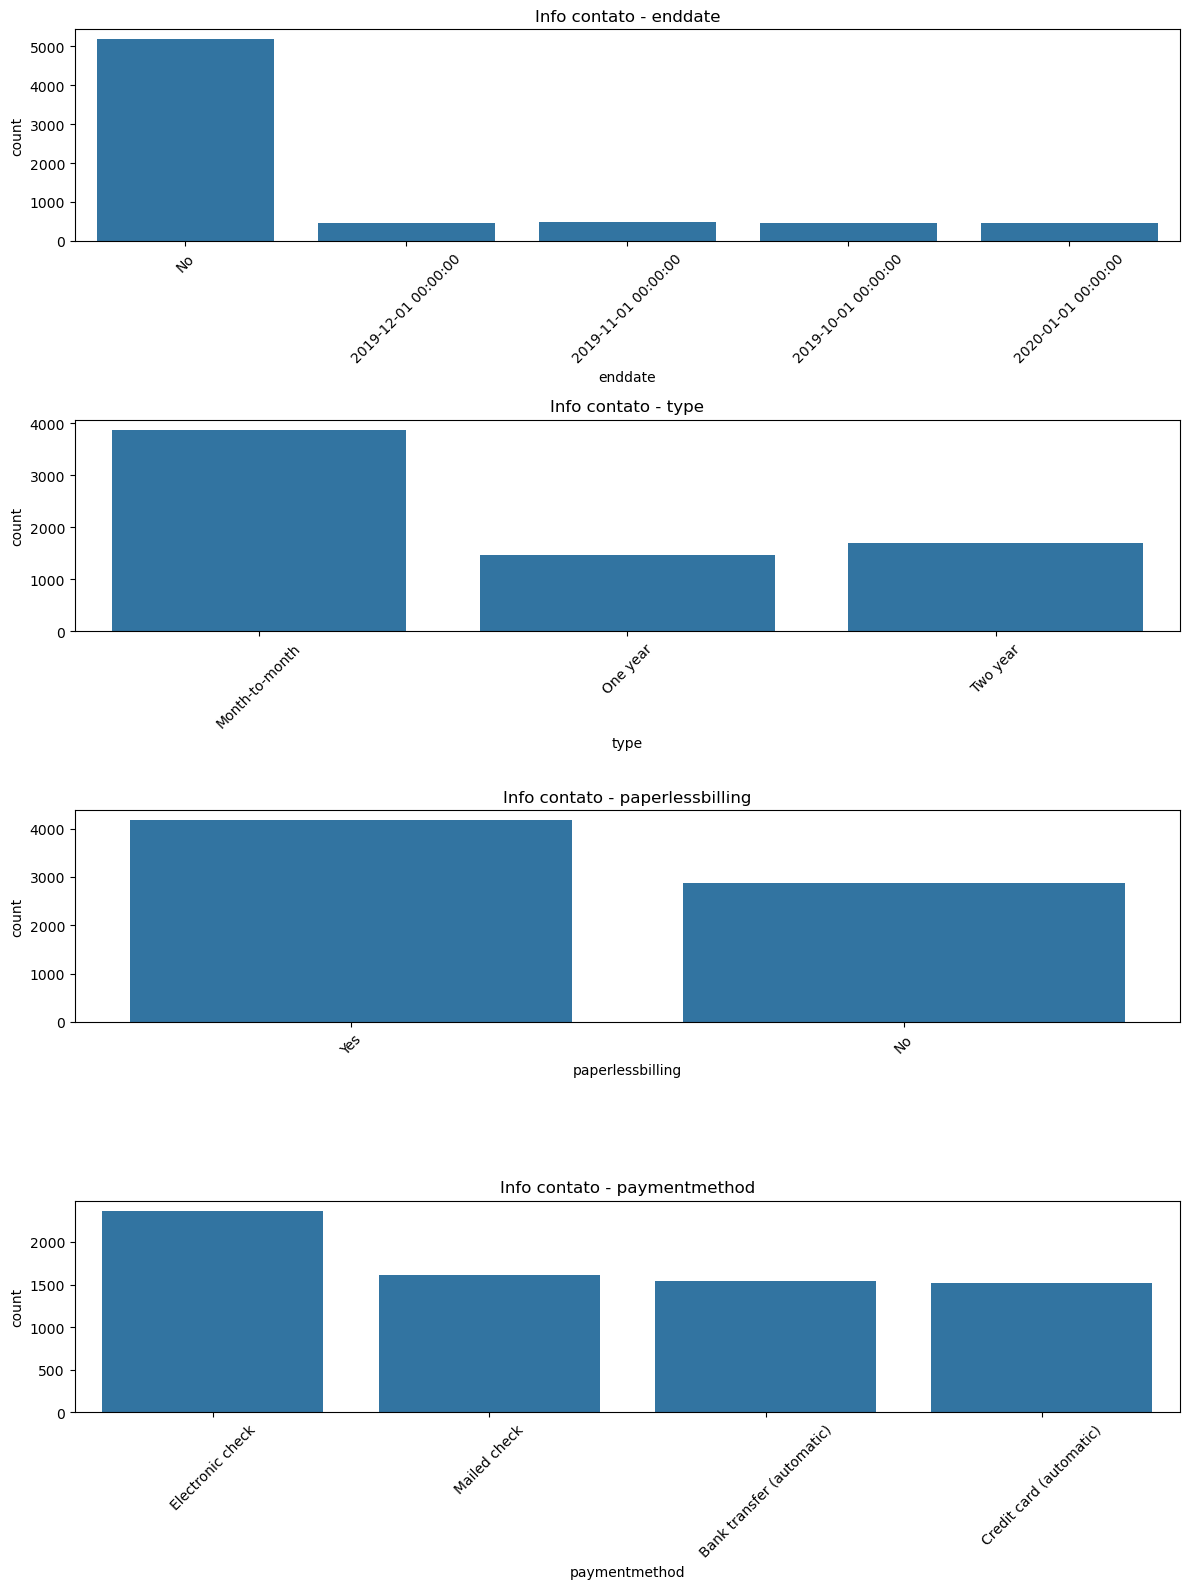

Frecuencia de enddate:
% enddate
No                     73.46
2019-11-01 00:00:00     6.89
2019-12-01 00:00:00     6.62
2020-01-01 00:00:00     6.53
2019-10-01 00:00:00     6.50
Name: count, dtype: float64


Frecuencia de type:
% type
Month-to-month    55.02
Two year          24.07
One year          20.91
Name: count, dtype: float64


Frecuencia de paperlessbilling:
% paperlessbilling
Yes    59.22
No     40.78
Name: count, dtype: float64


Frecuencia de paymentmethod:
% paymentmethod
Electronic check             33.58
Mailed check                 22.89
Bank transfer (automatic)    21.92
Credit card (automatic)      21.61
Name: count, dtype: float64




In [163]:
info(data_1)
columns_to_explore = ['enddate','type', 'paperlessbilling', 'paymentmethod'] 
plot_countplots(data_1, columns_to_explore, title_prefix='Info contato')
explore_data(data_1, columns_to_explore)

<div class="alert alert-block alert-info">
<b>

## Observaciones

* `TotalCharges` está almacenado como object, parece ser un valor numérico y podría necesitar conversión a float para análisis adicionales.
* `Begin/endDate` convertir a formato datetime

</b> <a class="tocSkip"></a>

In [164]:
data_1['totalcharges'] = pd.to_numeric(data_1['totalcharges'], errors='coerce')

In [165]:

info(data_1)

,customerid,begindate,enddate,type,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.50
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.90
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   begindate         7043 non-null   object 
 2   enddate           7043 non-null   object 
 3   type              7043 non-null   object 
 4   paperlessbilling  7043 non-null   object 
 5   paymentmethod     7043 non-null   object 
 6   monthlycharges    7043 non-null   float64
 7   totalcharges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB
None

       monthlycharges  totalcharges
count     7043.000000   7032.000000
mean        64.761692   2283.300441
std         30.090047   2266.771362
min         18.250000     18.800000
25%         35.500000    401.450000
50%         70.350000   1397.475000
75%         89.850000   3794.737500
max        118.750000   8684.800000

Duplicated:  0

Null values %:
custome


<div class="alert alert-block alert-info">
<b>

### 2. Información del tipo de contrato

* Contiene 7043 entradas y 8 columnas, 
* 0.15% de valores nulos en TotalCharges que se pueden eliminar
* No hay filas duplicadas. 

* `customerID`: Identificador único para cada cliente.
* `BeginDate`: fecha de inicio del contrato 
* `EndDate`: fecha de finalización del contrato (No, si no ha finalizado) 
    - 73.46% tienen "No" , lo que indica que estos clientes probablemente aún están activos y no han terminado su contrato.
    - 6.89% de los contratos terminaron el 1 de noviembre de 2019.
    - 6.62% de los contratos terminaron el 1 de diciembre de 2019.
    - 6.53% de loscontratos terminaron el 1 de enero de 2020.
    - 6.50 de los contratos terminaron el 1 de octubre de 2019.
    - Existen en total 1869 clientes que han terminado 
* `Type`: Tipo de contrato (Mensuala/1 año/2 años)
    - La mayoría de los clientes tienen contratos de mes a mes (55.02%).
    - Hay menos clientes con contratos de dos años (24.07%) y un año (20.91).
* `PaperlessBilling`: Recibo físico (Yes/no)
    - 59.22% de los clientes utilizan la facturación sin papel y 40.78% utiliza la facturación en papel.
* `PaymentMethod`: Método de pago(Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic))
    - El método de pago más común es el cheque electrónico (33.58%).
    - 22.89% heque por correo
    - 21.92 transferencia bancaria automática
    - 21.61 tarjeta de crédito automática 
* `MonthlyCharges`: Pago mensual
    - Cargo mensual tiene un valor medio de $64.798208
* `TotalCharges`: ¿Que otros cargos?
    - Cargo total tiene un valor medio de $2283.300441

La mayoría de las columnas son de tipo object, excepto MonthlyCharges que es de tipo float64.
  
</b> <a class="tocSkip"></a>

## Información del servicio de internet (data_2)

,customerid,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,DSL,Yes,No,No,No,No,No
8,7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,DSL,Yes,Yes,No,No,No,No



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerid        5517 non-null   object
 1   internetservice   5517 non-null   object
 2   onlinesecurity    5517 non-null   object
 3   onlinebackup      5517 non-null   object
 4   deviceprotection  5517 non-null   object
 5   techsupport       5517 non-null   object
 6   streamingtv       5517 non-null   object
 7   streamingmovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

        customerid internetservice onlinesecurity onlinebackup  \
count         5517            5517           5517         5517   
unique        5517               2              2            2   
top     7590-VHVEG     Fiber optic             No           No   
freq             1            3096           3498         3088   

       deviceprotection techsupport streamingtv stream

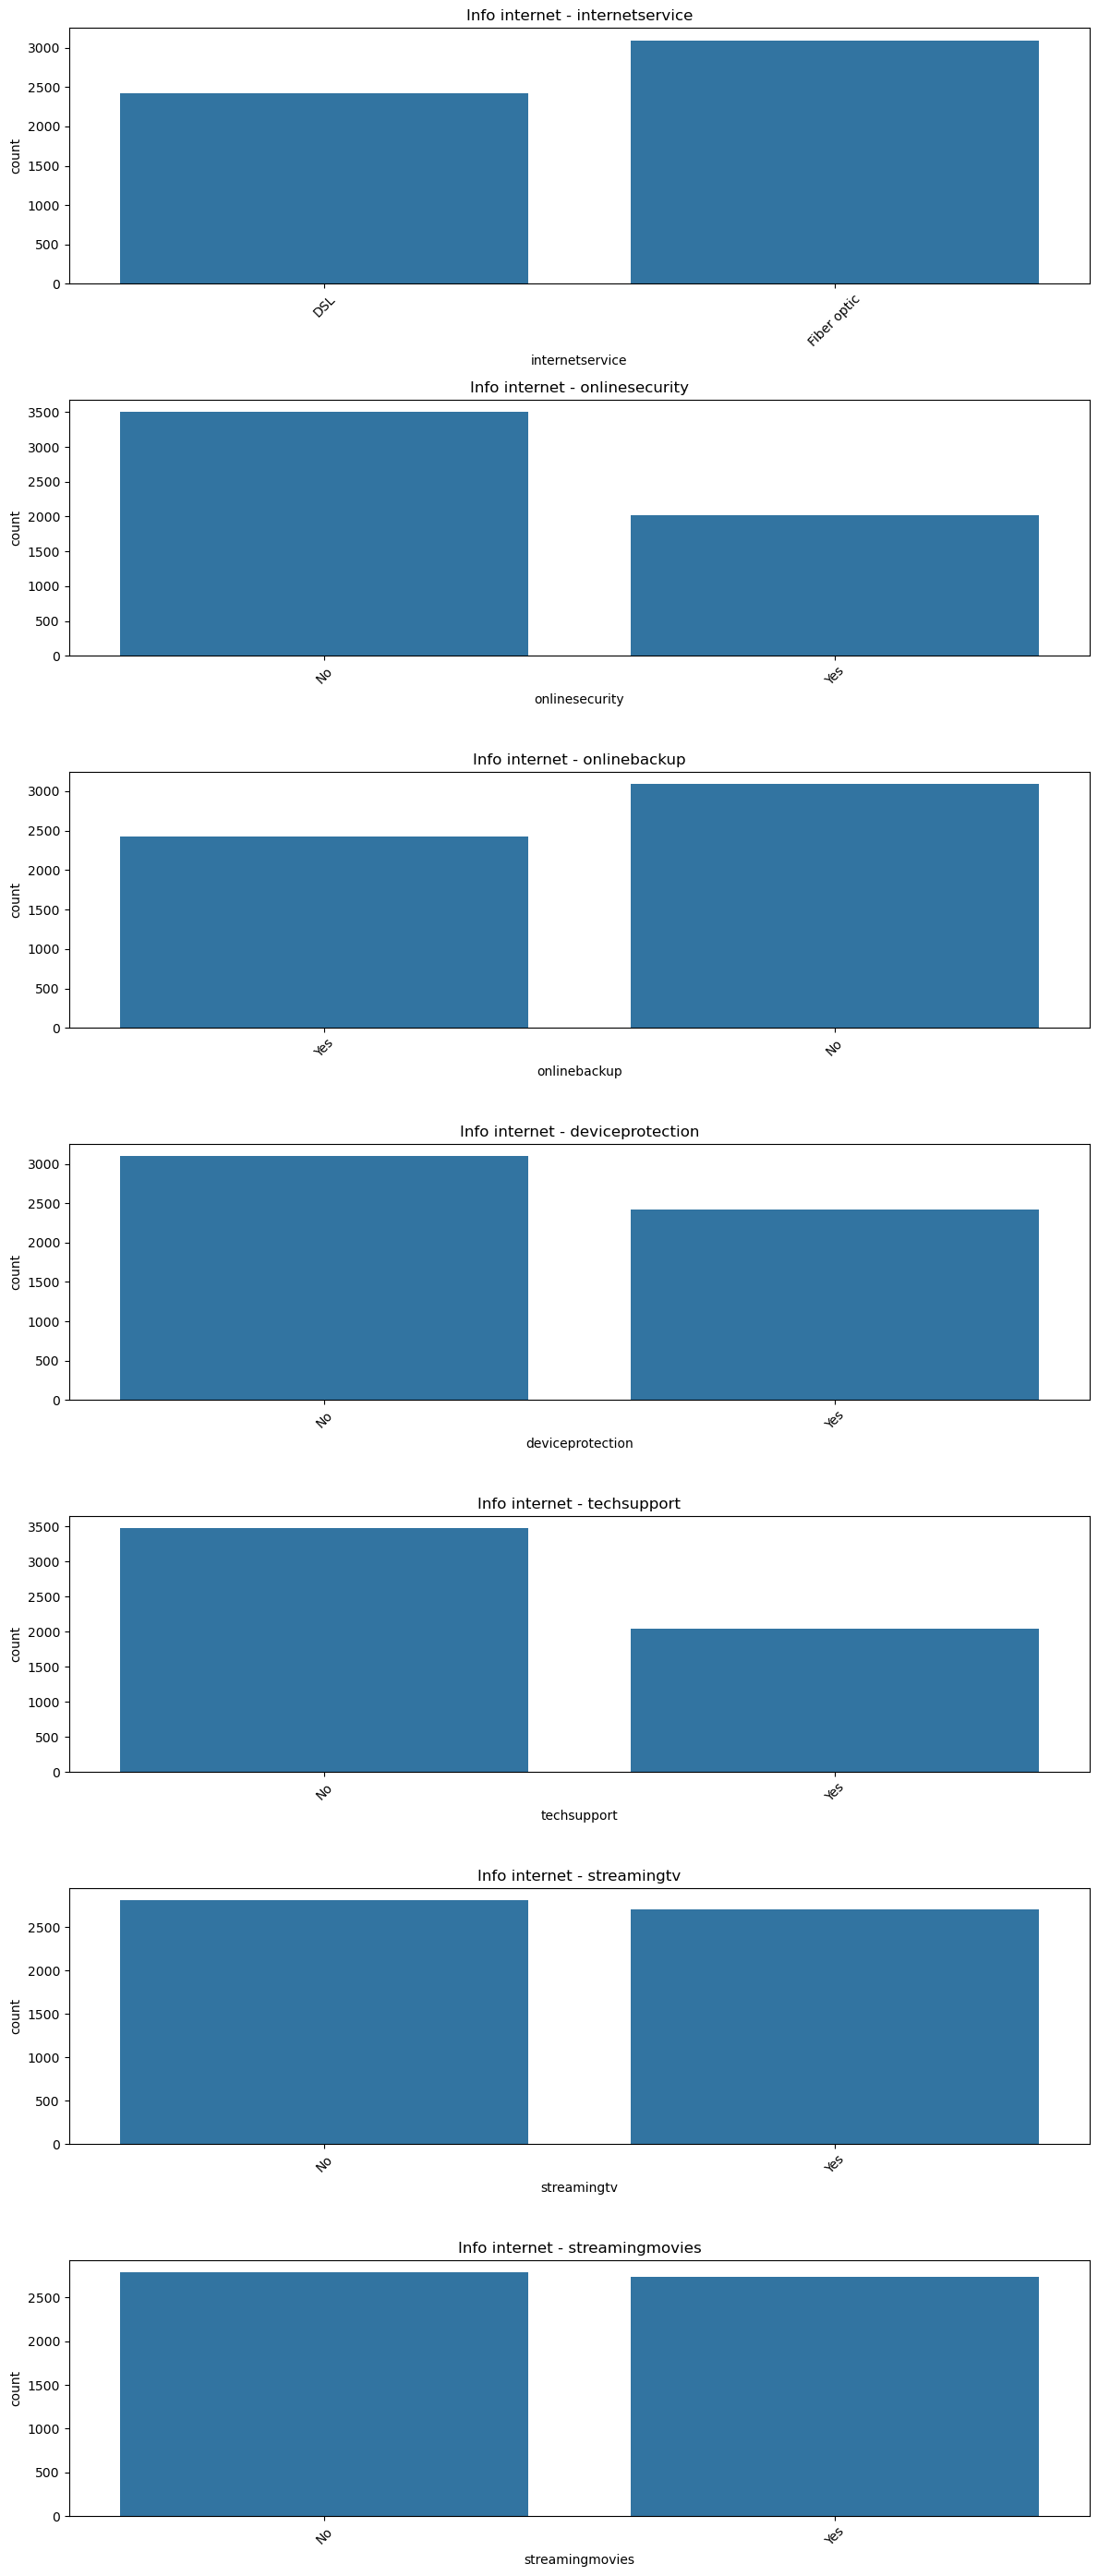

Frecuencia de internetservice:
% internetservice
Fiber optic    56.12
DSL            43.88
Name: count, dtype: float64


Frecuencia de onlinesecurity:
% onlinesecurity
No     63.4
Yes    36.6
Name: count, dtype: float64


Frecuencia de onlinebackup:
% onlinebackup
No     55.97
Yes    44.03
Name: count, dtype: float64


Frecuencia de deviceprotection:
% deviceprotection
No     56.1
Yes    43.9
Name: count, dtype: float64


Frecuencia de techsupport:
% techsupport
No     62.95
Yes    37.05
Name: count, dtype: float64


Frecuencia de streamingtv:
% streamingtv
No     50.93
Yes    49.07
Name: count, dtype: float64


Frecuencia de streamingmovies:
% streamingmovies
No     50.48
Yes    49.52
Name: count, dtype: float64




In [166]:
info(data_2)
columns_to_explore = data_2.columns.drop(['customerid'])                 
plot_countplots(data_2, columns_to_explore, title_prefix='Info internet')
explore_data(data_2, columns_to_explore)


<div class="alert alert-block alert-info">
<b>

### 3. Información sobre el servicio de internet

* Contiene 5517 entradas y 8 columnas,
### ¿por que faltan info de algunos clientes (1526)?
* Sin valores nulos ni filas duplicadas. 

* `InternetService`
   - La mayoría de los clientes utilizan Fiber optic (56.12%)  como servicio de Internet en lugar de DSL (43.88%).
* Otros servicios :
   - 63.4% de clientes no tienen `OnlineSecurity` 
   - 55.97% de clientes no tienen `OnlineBackup` 
   - 56.1% de clientes no tienen `DeviceProtection`
   - 62.95% de clientes no tienen `TechSupport`
   - 50.93% de clientes no tienen `StreamingTV`
   - 50.48% de clientes no tienen  `StreamingMovies`

</b> <a class="tocSkip"></a>

## Información sobre el servico de telefonía (data_3)

,customerid,multiplelines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
5,7892-POOKP,Yes
6,6388-TABGU,No
7,9763-GRSKD,No
8,7469-LKBCI,No
9,8091-TTVAX,Yes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerid     6361 non-null   object
 1   multiplelines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

        customerid multiplelines
count         6361          6361
unique        6361             2
top     5575-GNVDE            No
freq             1          3390

Duplicated:  0

Null values %:
customerid       0.0
multiplelines    0.0
dtype: float64


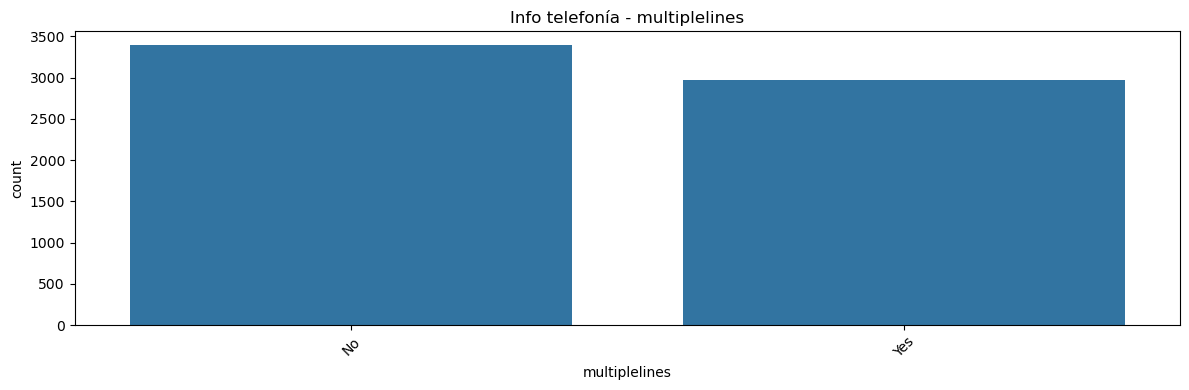

Frecuencia de multiplelines:
% multiplelines
No     53.29
Yes    46.71
Name: count, dtype: float64




In [167]:
info(data_3)
columns_to_explore = ['multiplelines']
plot_countplots(data_3, columns_to_explore, title_prefix='Info telefonía')
explore_data(data_3, columns_to_explore)


<div class="alert alert-block alert-info">
<b>


### 4. Información sobre el servicio de telefonía

* Contiene 6361 entradas y 1 columnas
* Sin valores nulos ni filas duplicadas
* 53.29% de clientes no tienen `MultipleLines`

</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-info">
<b>

# Conclusiones análisis exploratorio de los datos


1. Información del Cliente
`Género` y `SeniorCitizen`:
- Distribución equilibrada entre hombres y mujeres, porlo que el género probablemente no será un predictor significativo.
- Bajo porcentaje de adultos mayores (16.21%) que podrían influir en la tasa de cancelación debido a preferencias de servicio específicas o problemas con la tecnología.
`Dependents` y `Partner`:
- La mayoría de los clientes no tienen dependientes (70.04%) ni pareja (51.7%). Esto podría ser relevante si las personas solteras tienen menos probabilidades de cancelar contratos más largos.
2. Información del Contrato
`EndDate`:
- El 73.46% de los clientes aún son activos, y solo el  26.54% han cancelado. Esto puede dar un balance moderado para predecir cancelaciones.
`Type`:
- Los contratos mensuales tienen la mayor tasa de cancelación. Esto sugiere que los clientes de contratos a largo plazo son los mas leales.
`PaymentMethod`:
- Los pagos por cheque electrónico tienen la mayor representación (33.58%), lo que puede ser un factor en las cancelaciones si este método está asociado con clientes menos leales.
3. Información sobre Internet
- Algunos clientes (1526) no tienen servicio de Internet. Esto podría deberse a planes de telefonía exclusivamente, lo cual debe confirmarse.
- Los servicios adicionales, como seguridad en línea, respaldo, y soporte técnico, están subutilizados. Esto podría indicar que los clientes que no usan estos servicios ven menos valor en su contrato, lo que aumenta la probabilidad de cancelación.
4. Información sobre Telefonía
- Más de la mitad (53.29%) no tienen líneas múltiples. Esto puede ser un factor relevante si los clientes con servicios más simples tienen más probabilidades de cancelar.


</b> <a class="tocSkip"></a>


# Preprocesamiento de los datos

In [168]:
data_1['begindate'] = pd.to_datetime(data_1['begindate'], errors='coerce')
data_1['enddate'] = pd.to_datetime(data_1['enddate'], errors='coerce')
data_1['tenure'] = (data_1['enddate'] - data_1['begindate']).dt.days
data_1['tenure'] = data_1['tenure'].fillna(0)
data_1['enddate'] = data_1['enddate'].notnull().astype(int)


/tmp/ipykernel_27995/1395294150.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_1['enddate'] = pd.to_datetime(data_1['enddate'], errors='coerce')


##  Rellenar columnas

In [244]:
data_nan=data_0['customerid'].to_frame()

data_2 = data_2.merge(data_nan, on='customerid', how='outer')
data_2.fillna('No Service', inplace=True)

data_3 = data_3.merge(data_nan, on='customerid', how='outer')
data_3.fillna('No Servicio', inplace=True)


## Convertir las variables categóricas en variables numéricas

In [245]:
data_0 = encode_categorical_columns(data_0)
data_1 = encode_categorical_columns(data_1)
data_3 = encode_categorical_columns(data_3)
data_2 = encode_categorical_columns(data_2)

<div class="alert alert-block alert-info">
<b>

## Información de los datos personales de los clientes

|  Variables | Valores = 0 | Valores = 1 |
|-----------|-----------|-----------|
|  `gender` |  Female | Male |
| `SeniorCitizen`| No  |Si |
| `Partner` | No | Yes |
|`Dependents`| No | Yes |

</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-info">
<b>

## Información de los datos del contrato de los clientes

|  Variables | Valores = 0 | Valores = 1 | Valores = 2 |Valores = 3 |
|-----------|-----------|-----------|-----------|-----------|
|  `Type` |  Month-to-month  | One year | Two year ||
| `PaperlessBilling`| No  |Si ||
| `PaymentMethod` | Bank transfer (automatic)  | Credit card (automatic) | Electronic check | Mailed check |


</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-info">
<b>

## Información de los datos de internet

|  Variables | Valores = 0 | Valores = 2 | Valores = 1 |
|-----------|-----------|-----------|--- |
|  `InternetService` |  DSL  | Fiber optic | No servicio |
| `OnlineSecurity` | No  |Si | No servicio |
| `OnlineBackup` | No  | Si | No servicio |
| ` DeviceProtection` | No  | Si | No servicio |
| ` TechSupport` | No  | Si |  No servicio |
| ` StreamingTV` | No  | Si |  No servicio |
| ` StreamingMovies` | No  | Si | No servicio |

</b> <a class="tocSkip"></a>

 <div class="alert alert-block alert-info">
<b>

## Información de los servicios de telefonía

|  Variables | Valores = 0 | Valores = 2 | Valores = 1 |
|-----------|-----------|-----------| ---|
|  `MultipleLines` |  No  | Si | No servicio  |


</b> <a class="tocSkip"></a>


 <div class="alert alert-block alert-info">
<b>

## EndDate categorica

|  Variables | Valores = 0 | Valores = 1 | 
|-----------|-----------|-----------|
|  `EndDate` |  No  | Si |


</b> <a class="tocSkip"></a>

## Correlaciones entre variables

In [246]:
# merga endate column with data set data_0

data_0_end = data_0.merge(data_1[['customerid','enddate']], on='customerid', how='outer')
data_2_end = data_2.merge(data_1[['customerid','enddate']], on='customerid', how='outer')
data_3_end = data_3.merge(data_1[['customerid','enddate']], on='customerid', how='outer')   


<Axes: >

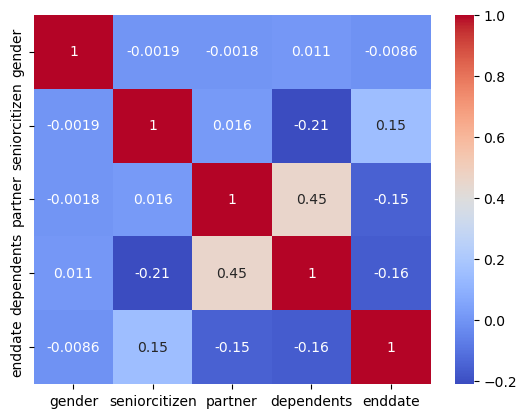

In [173]:
sns.heatmap(data_0_end.corr(numeric_only=True), annot=True, cmap='coolwarm')

<div class="alert alert-block alert-info">
<b>

1. `Gender` tiene correlaciones muy bajas con todas las demás variables, incluyendo `EndDate`, lo que sugiere que el género no es un factor importante en la relación con las otras características

2. `SeniorCitizen` tiene una correlación negativa baja con `Dependents`, lo que sugiere que los ciudadanos mayores tienden a tener menos dependientes. 

2. `Partner` tiene una correlación positiva moderada con Dependents, lo que sugiere que los clientes con pareja tienden a tener dependientes. 

4. `EndDate` tiene correlaciones muy bajas con todas las demás variables, lo que sugiere que la fecha de finalización del contrato no está fuertemente influenciada por el género, ser ciudadano mayor, tener pareja o tener dependientes.

</b> <a class="tocSkip"></a>

<Axes: >

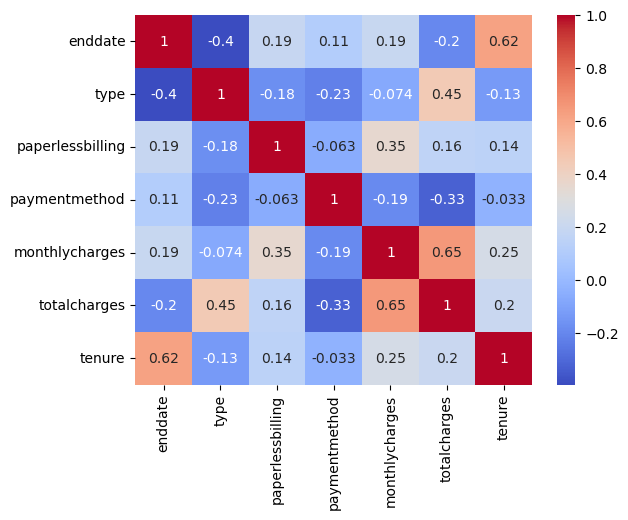

In [174]:
data_1.fillna(0, inplace=True)
sns.heatmap(data_1.corr(numeric_only=True), annot=True, cmap='coolwarm')

<div class="alert alert-block alert-info">
<b>


1. `Type` tiene una correlación positiva moderada con `TotalCharges` y `Tenure`, lo que sugiere que el tipo de contrato puede estar relacionado con el tiempo de permanencia y los cargos totales.

2. `PaperlessBilling` iene una correlación positiva baja con `MonthlyCharges`, lo que indica que los clientes con facturación sin papel tienden a tener cargos mensuales ligeramente más altos.

2. `PaymentMethod`tiene una correlación negativa moderada con `TotalCharges`  y `Tenure`, lo que sugiere que el método de pago puede estar relacionado con el tiempo de permanencia y los cargos totales.

3. `MonthlyCharges` tiene una correlación positiva moderada con `TotalCharges`, lo que sugiere que los cargos mensuales están fuertemente relacionados con los cargos totales. También tiene una correlación positiva baja con `Tenure`, lo que sugiere que los clientes con cargos mensuales más altos tienden a permanecer más tiempo.

4. `TotalCharges` tiene una correlación positiva fuerte con `Tenure`, ya que los cargos totales aumentan con el tiempo de permanencia.

5. `EndDate` tiene correlaciones muy bajas con todas las demás variables, lo que sugiere que no hay una relación lineal fuerte entre `EndDate` y las otras características.

</b> <a class="tocSkip"></a>

In [175]:

data_3_end = data_3_end[['customerid','multiplelines']]
data_2_end = data_2_end.merge(data_3, on='customerid', how='outer')

<Axes: >

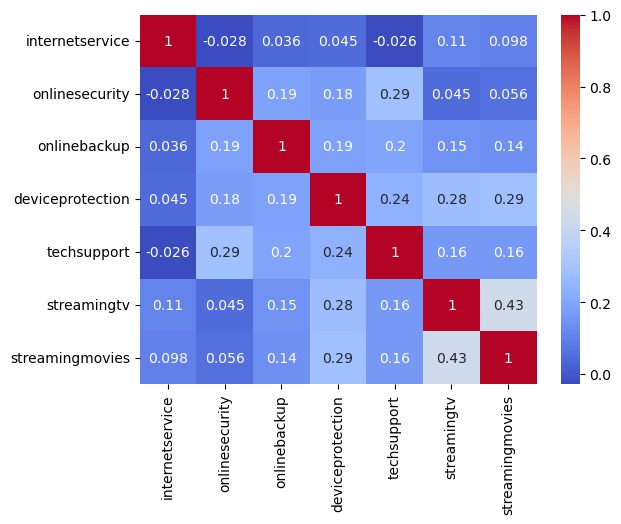

In [176]:
sns.heatmap(data_2.corr(numeric_only=True), annot=True, cmap='coolwarm')



<div class="alert alert-block alert-info">
<b>

1. `InternetService` tiene una correlación positiva baja con `StreamingTV`  y `StreamingMovies`, lo que sugiere que los clientes con servicio de internet tienden a utilizar servicios de streaming. También tiene una correlación negativa baja con `MultipleLines`, lo que indica que los clientes con servicio de internet tienden a no tener múltiples líneas telefónicas.

2. `OnlineSecurity`, `OnlineBackup`, y `DeviceProtection` tienen correlaciones positivas bajas entre sí y con otros servicios de protección y soporte técnico, lo que indica que los clientes con respaldo en línea tienden a tener otros servicios de protección y soporte técnico.

3. `TechSupport` tiene correlaciones positivas bajas con servicios de streaming.

4. `StreamingTV` y `StreamingMovies` tienen una correlación positiva moderada entre sí y correlaciones positivas bajas con múltiples líneas telefónicas.

5. `MultipleLines` muestra correlaciones positivas bajas con varios servicios adicionales.

6. `EndDate` no muestra correlaciones significativas con otras variables, lo que sugiere que la fecha de finalización del contrato no está fuertemente influenciada por las otras características.

</b> <a class="tocSkip"></a>

## Explorar la importancia de características

Como no existen correlaciones lineales fuertes entre las características, se explorara la importancia de las características con un modelo de árboles de decisión para identificar qué variables tienen mayor impacto en la predicción de `EndDate` 

In [177]:
# Unir los DataFrames

data_m1 = data_0.merge(data_1, on='customerid', how='outer')
data_m2 = data_m1.merge(data_2, on='customerid', how='outer')
data = data_m2.merge(data_3, on='customerid', how='outer')
#Categoricos
data = encode_categorical_columns(data)


Mean Squared Error: 0.14112407375827485


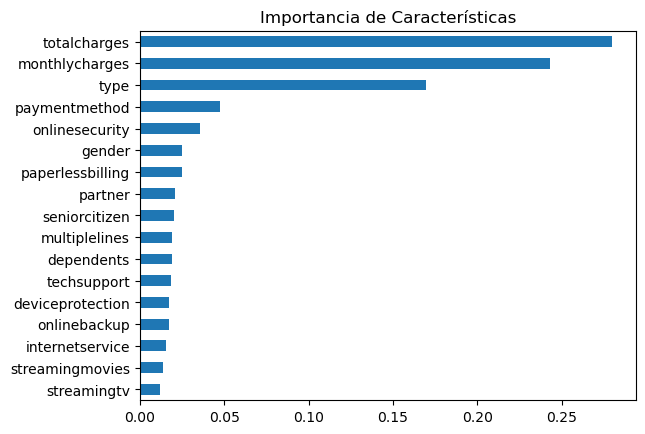

totalcharges        0.279796
monthlycharges      0.243245
type                0.169317
paymentmethod       0.047428
onlinesecurity      0.035766
gender              0.025240
paperlessbilling    0.024782
partner             0.021067
seniorcitizen       0.020166
multiplelines       0.019358
dependents          0.019239
techsupport         0.018526
deviceprotection    0.017477
onlinebackup        0.017269
internetservice     0.015552
streamingmovies     0.013546
streamingtv         0.012226
dtype: float64
Selected Features: Index(['totalcharges', 'monthlycharges', 'type', 'paymentmethod',
       'onlinesecurity', 'gender', 'paperlessbilling', 'partner',
       'seniorcitizen'],
      dtype='object')


In [178]:
filtered = select_features(data, feature_rf(data, ['enddate','customerid','begindate','tenure'], 'enddate'), 0.02)

<div class="alert alert-block alert-info">
<b>

| Importancia | ECM | Número de características |
| --- | --- | --- |
| 0.03 | 0.15541631880861626 | 3 |
| 0.025 | 0.15572231591608846 | 4 |
| `0.02` | `0.1495091350700038` | `10` |
| 0.018 | 0.14883199561389956 | 12 |
| 0.015 | 0.1463958745681502 | 13 |
| 0.01 | 0.14714277026619846 | 14 |

</b> <a class="tocSkip"></a>

In [179]:
data_filtered = pd.concat([data[filtered.columns], data['enddate']], axis=1)
info(data_filtered)

,totalcharges,monthlycharges,type,paymentmethod,onlinesecurity,gender,paperlessbilling,partner,seniorcitizen,enddate
0,593.30,65.60,1,3,0,0,1,1,0,0
1,542.40,59.90,0,3,0,1,0,0,0,0
2,280.85,73.90,0,2,0,1,1,0,0,1
3,1237.85,98.00,0,2,0,1,1,1,1,1
4,267.40,83.90,0,3,0,0,1,1,1,1
5,571.45,69.40,0,1,0,0,1,0,0,0
6,7904.25,109.70,2,0,2,0,1,1,1,0
7,5377.80,84.65,2,1,2,1,1,1,0,0
8,340.35,48.20,0,2,2,0,1,0,1,0
9,5957.90,90.45,2,3,2,0,1,1,0,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   totalcharges      7043 non-null   float64
 1   monthlycharges    7043 non-null   float64
 2   type              7043 non-null   int64  
 3   paymentmethod     7043 non-null   int64  
 4   onlinesecurity    7043 non-null   int64  
 5   gender            7043 non-null   int64  
 6   paperlessbilling  7043 non-null   int64  
 7   partner           7043 non-null   int64  
 8   seniorcitizen     7043 non-null   int64  
 9   enddate           7043 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 550.4 KB
None

       totalcharges  monthlycharges         type  paymentmethod  \
count   7043.000000     7043.000000  7043.000000    7043.000000   
mean    2279.734304       64.761692     0.690473       1.574329   
std     2266.794470       30.090047     0.833755       1.068104   
mi

<Axes: >

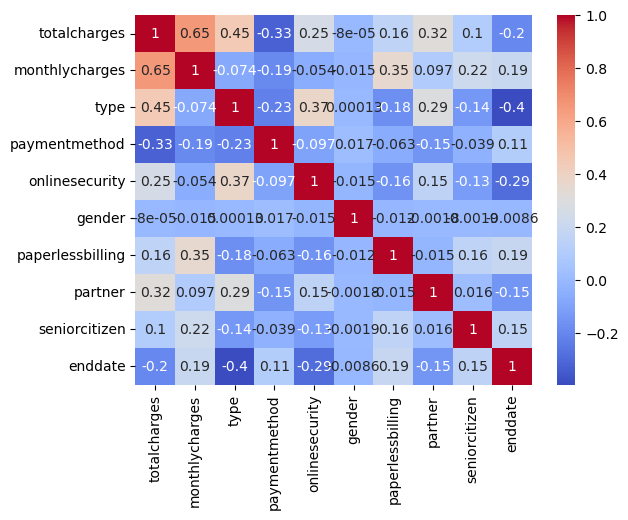

In [180]:
sns.heatmap(data_filtered.corr(numeric_only=True), annot=True, cmap='coolwarm')

<div class="alert alert-block alert-info">
<b>

# Conclusiones sobre el procesamiento de datos

1. Los clientes sin información de `Internet`, `Telefonia` `TotalCharges` se se rellena las columnas relacionadas con "No Service".

2. Se convertir las variables categóricas en variables numéricas

    - Agrupar variables

1. Calcula la duración en meses entre `BeginDate` y `EndDate`.

3. Se calcularon las correlaciones entre las variables. 
Como no existen correlaciones lineales fuertes entre las características, se utilizaó el análisis de importancia de características con un modelo de árboles de decisión para identificar qué variables tienen mayor impacto en la predicción de `EndDate` 

4. Se seleccionaron las características con importancia mas alta (0.02) ya que hay un equilibrio entre entre el ECM y el número de características.

- Las características son:
1. `TotalCharges`
2. `Monthlycharges`
3. `Type`
4. `PaymentMethod`
5. `OnlineeSecurity`
6. `Gender`
7. `PaperlessBilling`
8. `Partner`
10. `SeniorCitizen`


</b> <a class="tocSkip"></a>

# Modelos de ML

## Escalamiento de los datos


In [248]:
scale_data = scale_data(data_filtered, 'enddate')
scale_data.head()

,totalcharges,monthlycharges,type,paymentmethod,onlinesecurity,gender,paperlessbilling,partner,seniorcitizen,enddate
0,-0.744026,0.027862,0.371271,1.334863,-0.918838,-1.009559,0.829798,1.034530,-0.439916,0
1,-0.766482,-0.161583,-0.828207,1.334863,-0.918838,0.990532,-1.205113,-0.966622,-0.439916,0
2,-0.881874,0.303720,-0.828207,0.398558,-0.918838,0.990532,0.829798,-0.966622,-0.439916,1
3,-0.459662,1.104706,-0.828207,0.398558,-0.918838,0.990532,0.829798,1.034530,2.273159,1
4,-0.887808,0.636080,-0.828207,1.334863,-0.918838,-1.009559,0.829798,1.034530,2.273159,1


## Balance de características


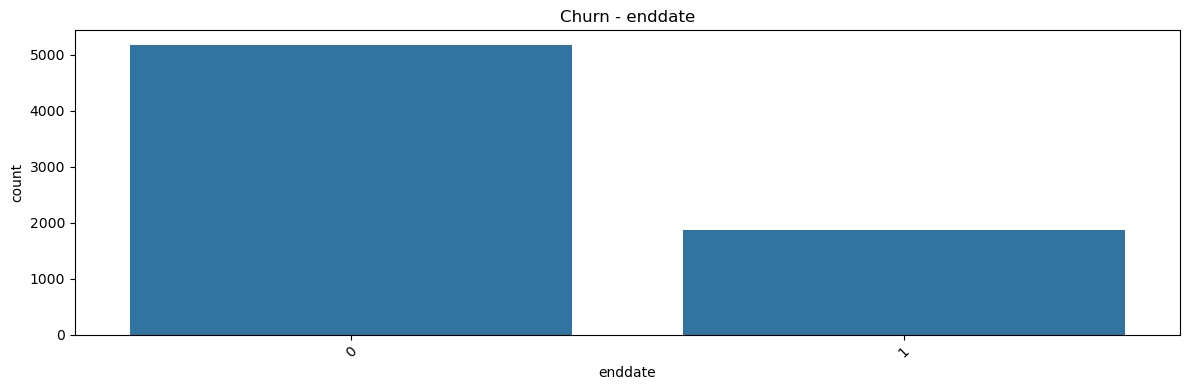

enddate
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [249]:
plot_countplots(data_filtered, ['enddate'], 'Churn')
class_distribution = data['enddate'].value_counts(normalize=True)
print(class_distribution)

In [250]:

balanced_data = balance_classes(scale_data, 'enddate')
balanced_data.enddate.value_counts(normalize=True)

enddate
0    0.5
1    0.5
Name: proportion, dtype: float64

## Separación de variables 


In [ ]:
# Dividir los datos escalados y balaceados en conjuntos de entrenamiento, validación y prueba
train_data, temp_data = train_test_split(balanced_data, test_size=0.4, random_state=12345)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=12345)

train_features = train_data.drop(columns=['enddate'])
train_target = train_data['enddate']

val_features = val_data.drop(columns=['enddate'])
val_target = val_data['enddate']

test_features = test_data.drop(columns=['enddate'])
test_target = test_data['enddate']


In [261]:
# Definir los modelos y sus nombres
models = [
    LogisticRegression(random_state=12345),
    DecisionTreeClassifier(random_state=12345),
    RandomForestClassifier(random_state=12345),
    GradientBoostingClassifier(random_state=12345),
    lgb.LGBMClassifier(random_state=12345,force_row_wise=True),
    CatBoostClassifier(random_state=12345)
]

model_names = ['Logistic Regression', 'DecisionTree','Random Forest', 'Gradient Boosting','LGBM','CatBoost']


In [262]:
f1_scores, roc_auc_scores, time_scores = train_and_evaluate_models(train_features, train_target, val_features, val_target, test_features, test_target, models, model_names)



Logistic Regression
Train: F1 0.7491749804731206, AUC 0.749735957155312
Validation: F1 0.7543916093362083, AUC 0.7791076724597445
Test: F1 0.7783664101821021, AUC 0.7549716631768795
Time: 0.025423765182495117 seconds

DecisionTree
Train: F1 0.9982280857490212, AUC 0.9982262216133184
Validation: F1 0.7391012079101069, AUC 0.7729273417903495
Test: F1 0.7729214216995375, AUC 0.7391107903971262
Time: 0.038559913635253906 seconds

Random Forest
Train: F1 0.9982280934731558, AUC 0.9982287125835513
Validation: F1 0.8201071335491964, AUC 0.8231130644376837
Test: F1 0.8229106551561143, AUC 0.8202294391166716
Time: 0.7833390235900879 seconds

Gradient Boosting
Train: F1 0.814632919516145, AUC 0.8151409473990119
Validation: F1 0.8066497320538958, AUC 0.8206350510305529
Test: F1 0.8198395328546091, AUC 0.8071401699555927
Time: 0.6868188381195068 seconds

LGBM
[LightGBM] [Info] Number of positive: 3100, number of negative: 3108
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data poin

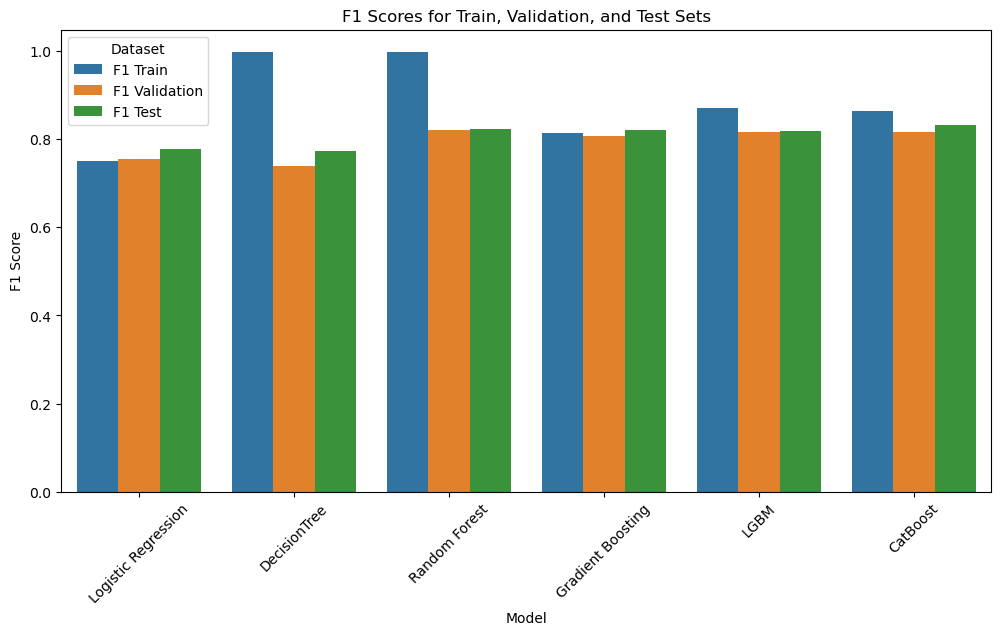

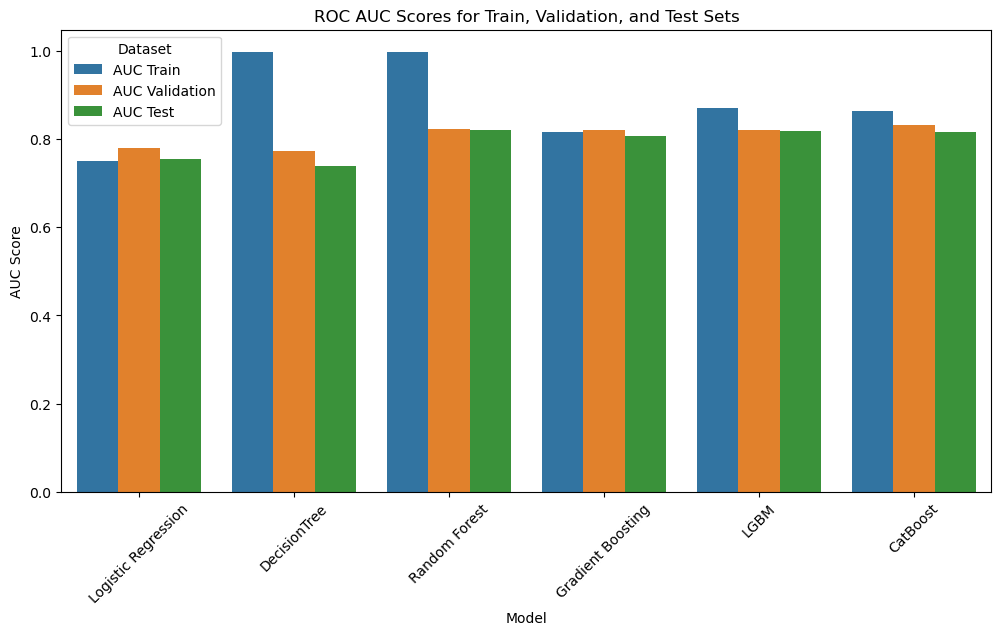

                 Model  F1 Train  F1 Validation   F1 Test
0  Logistic Regression  0.749175       0.754392  0.778366
1         DecisionTree  0.998228       0.739101  0.772921
2        Random Forest  0.998228       0.820107  0.822911
3    Gradient Boosting  0.814633       0.806650  0.819840
4                 LGBM  0.870954       0.816947  0.819342
5             CatBoost  0.863055       0.816078  0.831015

                 Model  AUC Train  AUC Validation  AUC Test
0  Logistic Regression   0.749736        0.779108  0.754972
1         DecisionTree   0.998226        0.772927  0.739111
2        Random Forest   0.998229        0.823113  0.820229
3    Gradient Boosting   0.815141        0.820635  0.807140
4                 LGBM   0.871183        0.819710  0.817297
5             CatBoost   0.863289        0.831310  0.816342


In [263]:
plot_and_print_scores(models, model_names, f1_scores, roc_auc_scores)


In [264]:
best_model_auc, best_model_f1 = find_best_models(roc_auc_scores, f1_scores,time_scores)

Best Model based on AUC Test:
           Model  AUC Train  AUC Validation  AUC Test
2  Random Forest   0.998229        0.823113  0.820229

Best Model based on F1 Test:
      Model  F1 Train  F1 Validation   F1 Test
5  CatBoost  0.863055       0.816078  0.831015

Time Scores:
                 Model      Time
0  Logistic Regression  0.025424
1         DecisionTree  0.038560
2        Random Forest  0.783339
3    Gradient Boosting  0.686819
4                 LGBM  0.114077
5             CatBoost  3.179602


## Optimización de parámetros

In [270]:
# grid search para los modelos utilizados

param_grid = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'DecisionTree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 7, 9],
        'min_samples_split': [2, 4, 6]
    },
    'Gradient Boosting':{
        'n_estimators': [10, 50],
        'max_depth': [3, 5],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2]
        },
    'LGBM': {
        'n_estimators': [50, 100],
        'max_depth': [3, 5],
        'learning_rate': [0.05, 0.1]
        },
    'CatBoost': {
        'iterations': [50, 100],
        'depth': [3, 5],
        'learning_rate': [0.05, 0.1]
    }
}

best_models_gs = {}

for model, params in param_grid.items():
    print(f'\n{model}')
    model_index = model_names.index(model)
    grid_search = GridSearchCV(models[model_index], params, scoring='roc_auc', n_jobs=-1, cv=5)
    grid_search.fit(train_features, train_target)
    best_models_gs[model] = grid_search.best_estimator_

    print(f'Best parameters: {grid_search.best_params_}')
    print(f'Best score: {grid_search.best_score_}')



Logistic Regression
Best parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best score: 0.8262675472155703

DecisionTree
Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score: 0.8162740128253245

Random Forest
Best parameters: {'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.87447729779269

Gradient Boosting
Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 50}
Best score: 0.8790291238054866

LGBM
[LightGBM] [Info] Number of positive: 2480, number of negative: 2486
[LightGBM] [Info] Total Bins 706
[LightGBM] [Info] Number of positive: 2480, number of negative: 2486
[LightGBM] [Info] Number of data points in the train set: 4966, number of used features: 9
[LightGBM] [Info] Number of positive: 2480, number of negative: 2487
[LightGBM] [Info] Number of positive: 2480, number of negative: 2486
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of positive: 2

In [276]:
# Definir los modelos con best_params
models_gs = [
    LogisticRegression(**best_models_gs['Logistic Regression'].get_params()),
    DecisionTreeClassifier(**best_models_gs['DecisionTree'].get_params()),
    RandomForestClassifier(**best_models_gs['Random Forest'].get_params()),
    GradientBoostingClassifier(**best_models_gs['Gradient Boosting'].get_params()),
    lgb.LGBMClassifier(**best_models_gs['LGBM'].get_params()),
    CatBoostClassifier(**best_models_gs['CatBoost'].get_params())
]

f1_scores_gs, roc_auc_scores_gs, time_scores_gs = train_and_evaluate_models(train_features, train_target, val_features, val_target, test_features, test_target, models_gs, model_names)    



Logistic Regression
Train: F1 0.7486575355957684, AUC 0.749254577157803
Validation: F1 0.7538945593394728, AUC 0.7795860984801456
Test: F1 0.7787832182983982, AUC 0.7544876360713615
Time: 0.03468060493469238 seconds

DecisionTree
Train: F1 0.8499313478912853, AUC 0.8500662182920248
Validation: F1 0.7747372774132171, AUC 0.8023353724394873
Test: F1 0.8020659769656616, AUC 0.7748317107300922
Time: 0.0328066349029541 seconds

Random Forest
Train: F1 0.8612380668071247, AUC 0.8618732096151451
Validation: F1 0.8050517772978553, AUC 0.82256742539588
Test: F1 0.8217819637672279, AUC 0.8056787534971775
Time: 1.1182153224945068 seconds

Gradient Boosting
Train: F1 0.8321844651881505, AUC 0.8325283347863993
Validation: F1 0.8139285158279774, AUC 0.8250136993206817
Test: F1 0.8245699678469672, AUC 0.8143875073397553
Time: 0.6454253196716309 seconds

LGBM
[LightGBM] [Info] Number of positive: 3100, number of negative: 3108
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points i

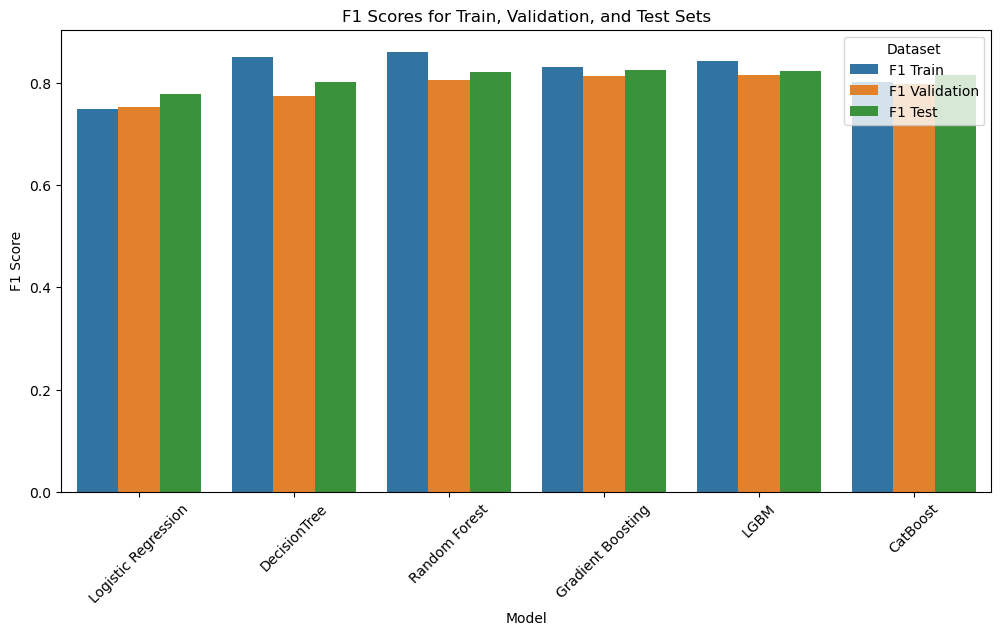

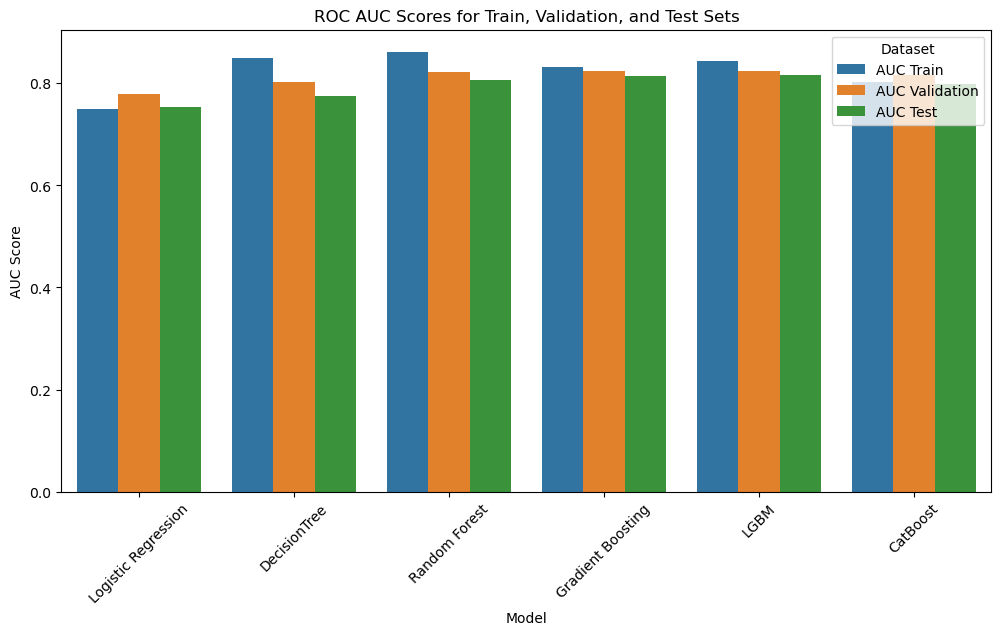

                 Model  F1 Train  F1 Validation   F1 Test
0  Logistic Regression  0.748658       0.753895  0.778783
1         DecisionTree  0.849931       0.774737  0.802066
2        Random Forest  0.861238       0.805052  0.821782
3    Gradient Boosting  0.832184       0.813929  0.824570
4                 LGBM  0.842340       0.815430  0.823657
5             CatBoost  0.802778       0.797927  0.815482

                 Model  AUC Train  AUC Validation  AUC Test
0  Logistic Regression   0.749255        0.779586  0.754488
1         DecisionTree   0.850066        0.802335  0.774832
2        Random Forest   0.861873        0.822567  0.805679
3    Gradient Boosting   0.832528        0.825014  0.814388
4                 LGBM   0.842678        0.824053  0.815841
5             CatBoost   0.803386        0.816288  0.798444


In [277]:
plot_and_print_scores(models_gs, model_names, f1_scores_gs, roc_auc_scores_gs)

In [278]:
best_model_auc_gs, best_model_f1_gs = find_best_models(roc_auc_scores_gs, f1_scores_gs,time_scores_gs)

Best Model based on AUC Test:
  Model  AUC Train  AUC Validation  AUC Test
4  LGBM   0.842678        0.824053  0.815841

Best Model based on F1 Test:
               Model  F1 Train  F1 Validation  F1 Test
3  Gradient Boosting  0.832184       0.813929  0.82457

Time Scores:
                 Model      Time
0  Logistic Regression  0.034681
1         DecisionTree  0.032807
2        Random Forest  1.118215
3    Gradient Boosting  0.645425
4                 LGBM  0.098257
5             CatBoost  0.434795


## Ensamble de Modelos con Balanceo

In [279]:
# Dividir los datos escalados en conjuntos de entrenamiento, validación y prueba
train_data_bg, temp_data_bg = train_test_split(scale_data, test_size=0.4, random_state=12345)
val_data_bg, test_data_bg = train_test_split(temp_data_bg, test_size=0.5, random_state=12345)

train_features_bg = train_data_bg.drop(columns=['enddate'])
train_target_bg = train_data_bg['enddate']

val_features_bg = val_data_bg.drop(columns=['enddate'])
val_target_bg = val_data_bg['enddate']

test_features_bg = test_data_bg.drop(columns=['enddate'])
test_target_bg = test_data_bg['enddate']


In [275]:
# bagging con para models
models_bg = [
    BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), random_state=12345),
    BalancedBaggingClassifier(estimator=RandomForestClassifier(), random_state=12345),
    BalancedBaggingClassifier(estimator=GradientBoostingClassifier(), random_state=12345),
    BalancedBaggingClassifier(estimator=lgb.LGBMClassifier(), random_state=12345),
    BalancedBaggingClassifier(estimator=CatBoostClassifier(verbose=0), random_state=12345)
]

model_names_bg = ['Balanced Bagging Decision Tree', 'Balanced Bagging Random Forest', 'Balanced Bagging Gradient Boosting', 'Balanced Bagging LGBM', 'Balanced Bagging CatBoost']

f1_scores_bg, roc_auc_scores_bg, time_scores_bg= train_and_evaluate_models(train_features_bg, train_target_bg, val_features_bg, val_target_bg, test_features_bg, test_target_bg, models_bg, model_names_bg)



Balanced Bagging Decision Tree
Train: F1 0.9300307533989036, AUC 0.94077190389957
Validation: F1 0.7594639975779659, AUC 0.7251842388171322
Test: F1 0.7685581791159177, AUC 0.7205177139636755
Time: 0.11059713363647461 seconds

Balanced Bagging Random Forest
Train: F1 0.8894499430352255, AUC 0.9120093600727813
Validation: F1 0.7671628504702527, AUC 0.7626175674763307
Test: F1 0.775729456704567, AUC 0.7596331685324179
Time: 3.262538433074951 seconds

Balanced Bagging Gradient Boosting
Train: F1 0.7785015647782905, AUC 0.787499273509659
Validation: F1 0.7606976529802929, AUC 0.7686692737952417
Test: F1 0.7654879193029375, AUC 0.7713182365448163
Time: 2.587456226348877 seconds

Balanced Bagging LGBM
[LightGBM] [Info] Number of positive: 1098, number of negative: 1098
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 535
[LightGBM] [Info] Number of da

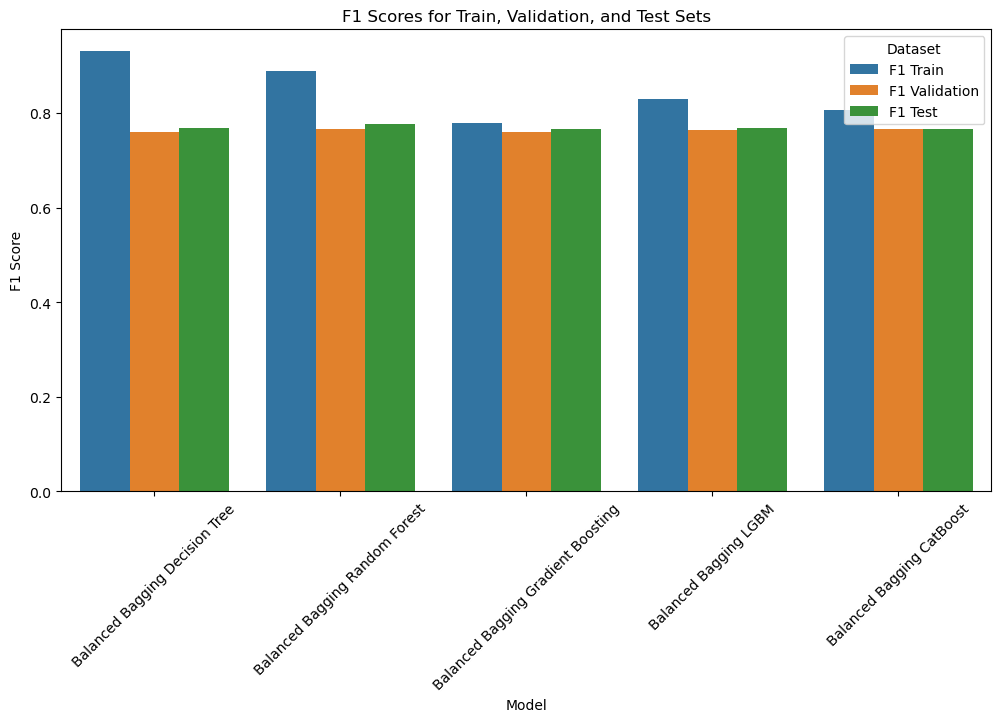

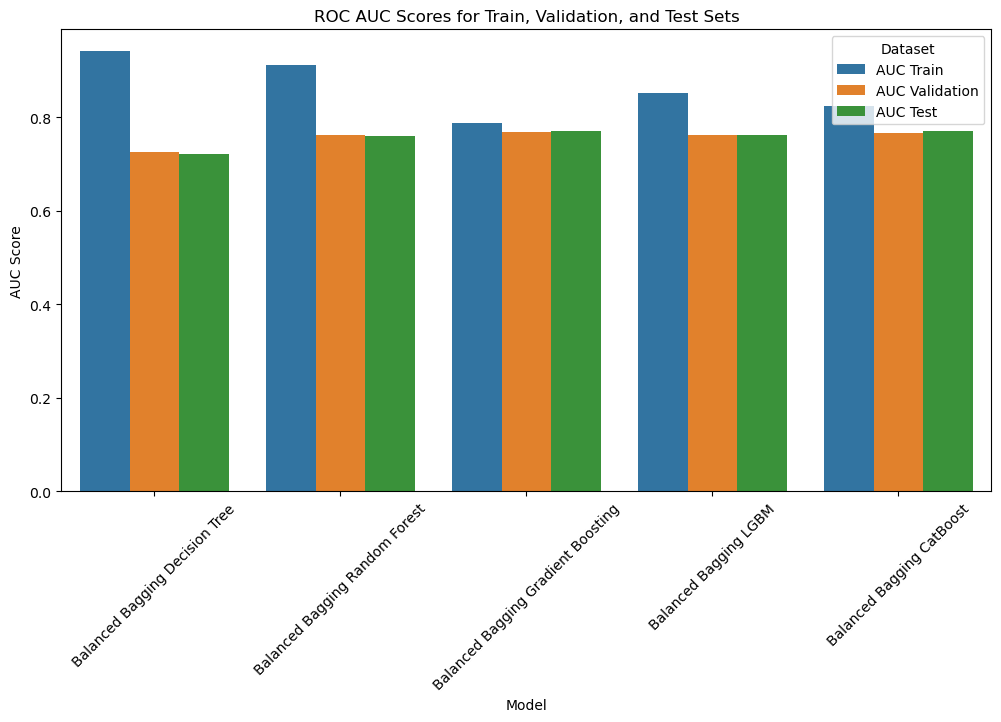

                                Model  F1 Train  F1 Validation   F1 Test
0      Balanced Bagging Decision Tree  0.930031       0.759464  0.768558
1      Balanced Bagging Random Forest  0.889450       0.767163  0.775729
2  Balanced Bagging Gradient Boosting  0.778502       0.760698  0.765488
3               Balanced Bagging LGBM  0.829987       0.764959  0.769226
4           Balanced Bagging CatBoost  0.806188       0.766866  0.765367

                                Model  AUC Train  AUC Validation  AUC Test
0      Balanced Bagging Decision Tree   0.940772        0.725184  0.720518
1      Balanced Bagging Random Forest   0.912009        0.762618  0.759633
2  Balanced Bagging Gradient Boosting   0.787499        0.768669  0.771318
3               Balanced Bagging LGBM   0.851841        0.762515  0.761861
4           Balanced Bagging CatBoost   0.823182        0.766937  0.771170


In [280]:
plot_and_print_scores(models_bg, model_names_bg, f1_scores_bg, roc_auc_scores_bg)


In [289]:
best_model_auc_bg, best_model_f1_bg= find_best_models(roc_auc_scores_bg, f1_scores_bg,time_scores_bg)


Best Model based on AUC Test:
                                Model  AUC Train  AUC Validation  AUC Test
2  Balanced Bagging Gradient Boosting   0.787499        0.768669  0.771318

Best Model based on F1 Test:
                            Model  F1 Train  F1 Validation   F1 Test
1  Balanced Bagging Random Forest   0.88945       0.767163  0.775729

Time Scores:
                                Model       Time
0      Balanced Bagging Decision Tree   0.110597
1      Balanced Bagging Random Forest   3.262538
2  Balanced Bagging Gradient Boosting   2.587456
3               Balanced Bagging LGBM   0.798020
4           Balanced Bagging CatBoost  23.566256


### Conclusiones

In [285]:
best_model_auc, best_model_f1 = find_best_models(roc_auc_scores, f1_scores,time_scores)

Best Model based on AUC Test:
           Model  AUC Train  AUC Validation  AUC Test
2  Random Forest   0.998229        0.823113  0.820229

Best Model based on F1 Test:
      Model  F1 Train  F1 Validation   F1 Test
5  CatBoost  0.863055       0.816078  0.831015

Time Scores:
                 Model      Time
0  Logistic Regression  0.025424
1         DecisionTree  0.038560
2        Random Forest  0.783339
3    Gradient Boosting  0.686819
4                 LGBM  0.114077
5             CatBoost  3.179602


In [286]:
best_model_auc_gs, best_model_f1_gs = find_best_models(roc_auc_scores_gs, f1_scores_gs,time_scores_gs)


Best Model based on AUC Test:
  Model  AUC Train  AUC Validation  AUC Test
4  LGBM   0.842678        0.824053  0.815841

Best Model based on F1 Test:
               Model  F1 Train  F1 Validation  F1 Test
3  Gradient Boosting  0.832184       0.813929  0.82457

Time Scores:
                 Model      Time
0  Logistic Regression  0.034681
1         DecisionTree  0.032807
2        Random Forest  1.118215
3    Gradient Boosting  0.645425
4                 LGBM  0.098257
5             CatBoost  0.434795


In [290]:
best_model_auc_bg, best_model_f1_bg= find_best_models(roc_auc_scores_bg, f1_scores_bg,time_scores_bg)


Best Model based on AUC Test:
                                Model  AUC Train  AUC Validation  AUC Test
2  Balanced Bagging Gradient Boosting   0.787499        0.768669  0.771318

Best Model based on F1 Test:
                            Model  F1 Train  F1 Validation   F1 Test
1  Balanced Bagging Random Forest   0.88945       0.767163  0.775729

Time Scores:
                                Model       Time
0      Balanced Bagging Decision Tree   0.110597
1      Balanced Bagging Random Forest   3.262538
2  Balanced Bagging Gradient Boosting   2.587456
3               Balanced Bagging LGBM   0.798020
4           Balanced Bagging CatBoost  23.566256


<div class="alert alert-block alert-info">
<b>

# Conclusiones 

Con la selección de 10 variables y los datos escalados y balanceados para aumentar la característica minoritario, es decir,los clientes que ya terminaron su contrato, tenmos que:

1. Se hicieron 3 tipos de análisis:
- Entrenamiento simpo, es decir,sin fijsr parámetros en los 
modelos de ML
- Optimizando los parámetros con GridSearch
- Con Bagging, para muestras desbalanceadas y los mismos modelos anteriores
2. Se evaluaron los modeloscon 2 métricas: AUC y F1

Resultados:

1. En el caso de la métrica de AUC el mejor modelo fue el de Random Forest con GridSearch, pero toma mucho tiempo, sin embargo con el modelo simple se obtine un resultado muy parecido y consume menos tiempo.


2. En el caso de la métrica F1 el mejor modelo fue CatBoost del modelo simple. 

## Mejor modelo AUC:

|     |      |       |     |    |
| --- |---   |---    |--- | --- |
| Tipo |Model | Train | Validation | Test |
|  Simple | Random Forest |   0.998229 |  0.823113 | 0.820229 |
| `GridSearch` |  `LGBM` |  `0.842678`  | `0.824053`  | `0.815841` |
| Bagging | Balanced Bagging Gradient Boosting | 0.787499  | 0.768669 | 0.771318 |

## Mejor modelo F1:

|     |      |       |     |    |
| --- |---   |---    |--- | --- |
| Tipo |Model | Train | Validation | Test |
|  `Simple` |  `CatBoost` | `0.863055` | `0.816078` | `0.831015` |
| GridSearch |Gradient Boosting | 0.832184 | 0.813929 | 0.82457|
| Bagging | Balanced Bagging Random Forest |  0.88945` | 0.767163` | 0.775729 |









</b> <a class="tocSkip"></a>


